Notebook shows line tracking for black tape on a floor.

In [18]:
import cv2
import numpy as np

# this lets you draw inline pictures in the notebooks
%matplotlib inline 
from matplotlib import pyplot as plt 

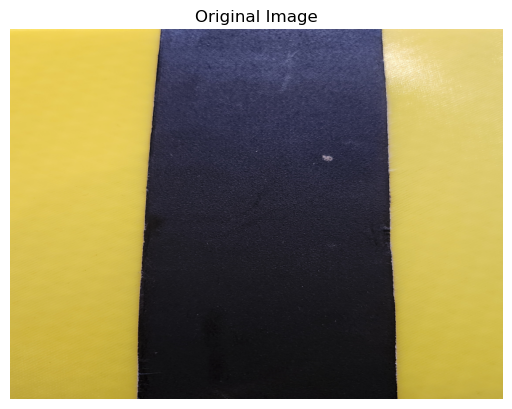

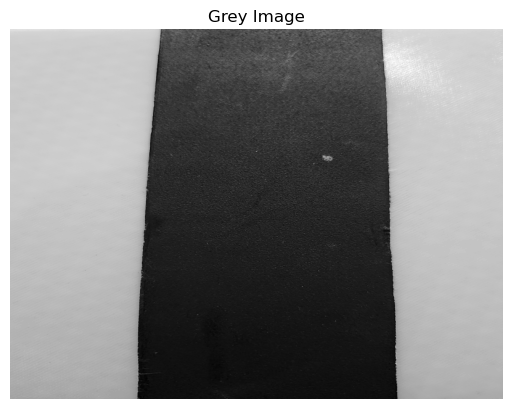

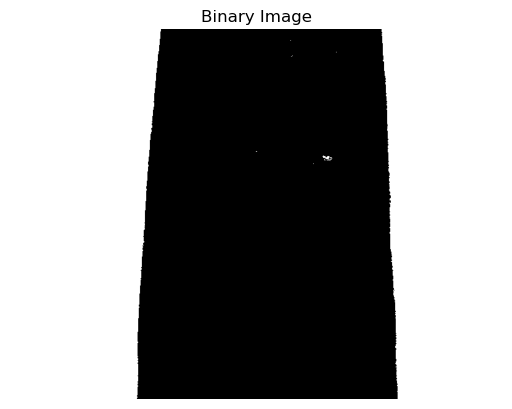

In [27]:
resize_dim = (800,600) #(width,height)

#Before obtaining a binary image we must use a grayscale image
orig_image = cv2.imread("tape_line.jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
grey_image = cv2.imread("tape_line.jpg",cv2.IMREAD_GRAYSCALE)
grey_image = cv2.resize(grey_image, resize_dim, interpolation=cv2.INTER_AREA) 
orig_image = cv2.resize(orig_image, resize_dim, interpolation=cv2.INTER_AREA) 

threshold = 127
max_val = 255

#If a pixel value is above threshold then set it to 1 (white) else 0 (black)
_, binary_image = cv2.threshold(grey_image, threshold, max_val, cv2.THRESH_BINARY)

plt.imshow(orig_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(grey_image,cmap='gray')
plt.title("Grey Image")
plt.axis('off')
plt.show()

plt.imshow(binary_image,cmap="grey")
plt.title("Binary Image")
plt.axis("off")
plt.show()

Notice from the binary image that white spots are showing up as noise within the tape region. We'll solve this using a morphological operation called erosion.
More info on morphological operations can be found from this yoututbe video: https://www.youtube.com/watch?v=uUweXBmm978

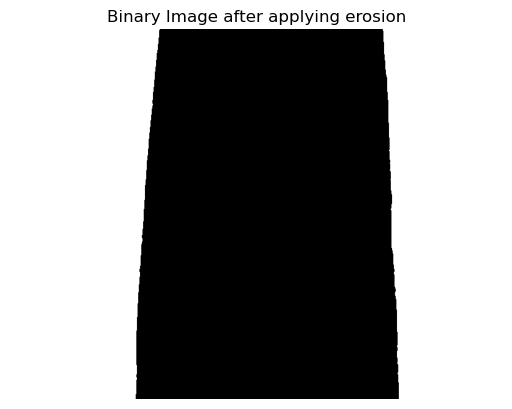

In [32]:
kernel = np.ones((5,5),np.uint8)
new_binary_image = cv2.erode(binary_image,kernel,iterations=1)
dilate_binary_image = cv2.dilate(new_binary_image,kernel,iterations=2)

plt.imshow(new_binary_image,cmap="grey")
plt.title("Binary Image after applying erosion")
plt.axis('off')
plt.show()